In [392]:
import pandas as pd # read_csv, datetime, DataFrame
import numpy as np # random.normal, sin

from pandas.plotting import autocorrelation_plot as auto_corr

from matplotlib import pyplot as plt # for plotting
import seaborn as sns; sns.set() # for prettier plots / formatting / style

# jupyter cell magic for inline visualization
%matplotlib inline 

# tsa : time series analysis
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# metrics
from sklearn import metrics # explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
#from sklearn.utils import check_arrays # converts list-like objects to array (if needed)

from sklearn.model_selection import train_test_split
# scikit-learn models
from sklearn.linear_model import LinearRegression as LinReg
from datetime import datetime as dt

In [394]:
data = pd.read_csv("zillow_data.csv")

data1 = pd.read_csv('zillow_datetimeindex.csv', index_col=[0])
data1.head()


,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,84781,12429,97028,12720,1338,3293,40404,81225,89155,National Average
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,...,135900.0,78300.0,136200.0,62500.0,94600.0,92700.0,57100.0,191100.0,176400.0,118279.096623
1996-05-01,335400.0,236900.0,212200.0,500900.0,77300.0,95200.0,152700.0,216700.0,95600.0,771100.0,...,136300.0,78300.0,136600.0,62600.0,94300.0,92500.0,57300.0,192400.0,176300.0,118398.954831
1996-06-01,336500.0,236700.0,212200.0,503100.0,77300.0,95400.0,152600.0,216900.0,95800.0,776500.0,...,136600.0,78200.0,136800.0,62700.0,94000.0,92400.0,57500.0,193700.0,176100.0,118517.285485
1996-07-01,337600.0,235400.0,210700.0,504600.0,77300.0,95700.0,152400.0,217000.0,96100.0,781900.0,...,136900.0,78200.0,136800.0,62700.0,93700.0,92200.0,57700.0,195000.0,176000.0,118632.875311
1996-08-01,338500.0,233300.0,208300.0,505500.0,77400.0,95900.0,152300.0,217100.0,96400.0,787300.0,...,137100.0,78100.0,136700.0,62700.0,93400.0,92100.0,58000.0,196300.0,175900.0,118760.020465


In [395]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [399]:
test = data[data['CountyName'] == 'King'].iloc[:,-12:].sort_values(by=['2018-04'], ascending=False)[:5]
top_king_zipcodes = data[data['CountyName'] == 'King'].iloc[:,-12:].sort_values(by=['2018-04'], ascending=False)[:5].index
# train = data[data['CountyName'] == 'King'].iloc[:,-36:-13].sort_values(by=['2017-03'], ascending=False)[:5]
# test
top_king_zipcodes
train = data.iloc[top_king_zipcodes].iloc[:,-36:-12]
test
# test

,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11977,2523300,2570700,2601300,2621900,2642300,2669300,2702000,2744900,2788900,2813200,2828500,2839900
1125,1841300,1883400,1908100,1912200,1919700,1943400,1968300,1996000,2025600,2052200,2082200,2103200
3964,1480900,1500700,1514900,1524600,1534700,1545700,1560500,1584600,1611400,1625700,1636300,1646200
4026,1226900,1243800,1253000,1258900,1266600,1278000,1289000,1302500,1320600,1335900,1349100,1358100
1484,1150100,1167800,1183600,1202100,1221800,1237500,1252400,1267800,1285100,1301200,1315900,1321600


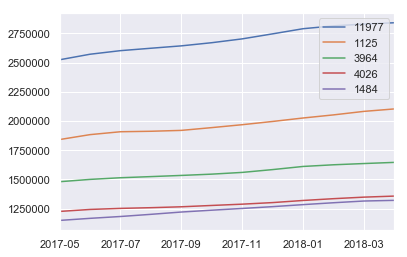

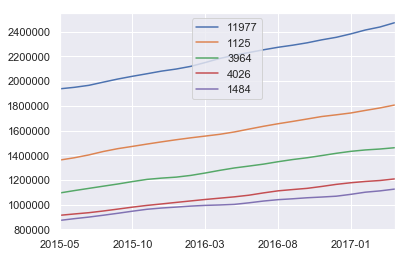

In [400]:
test.iloc[:,:].T.plot()
train.iloc[:,:].T.plot()

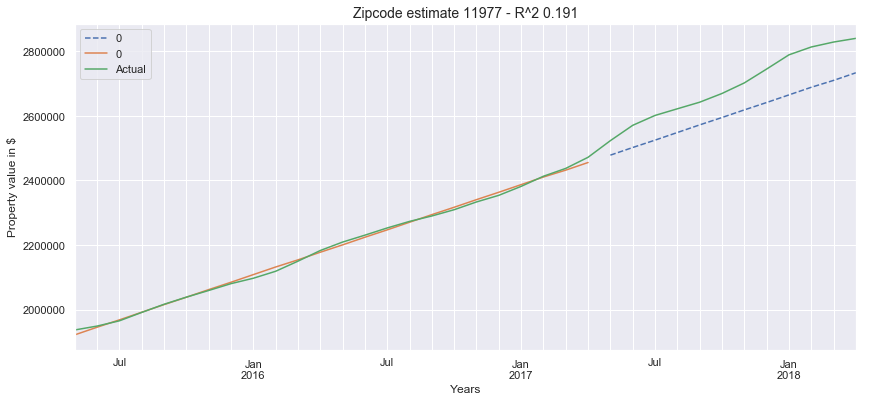

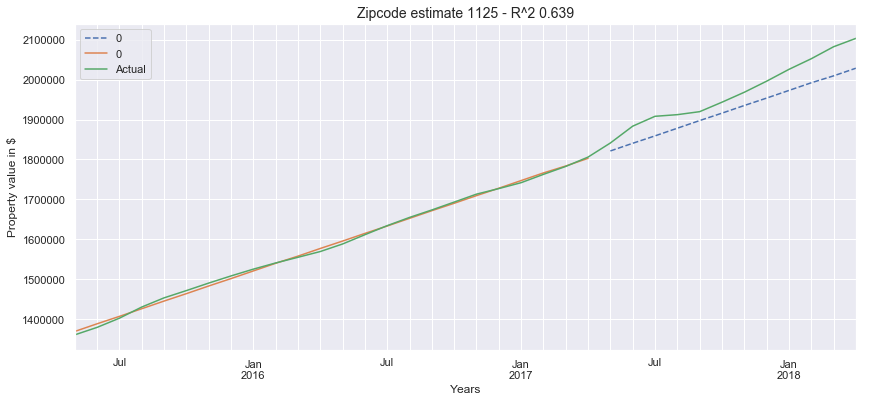

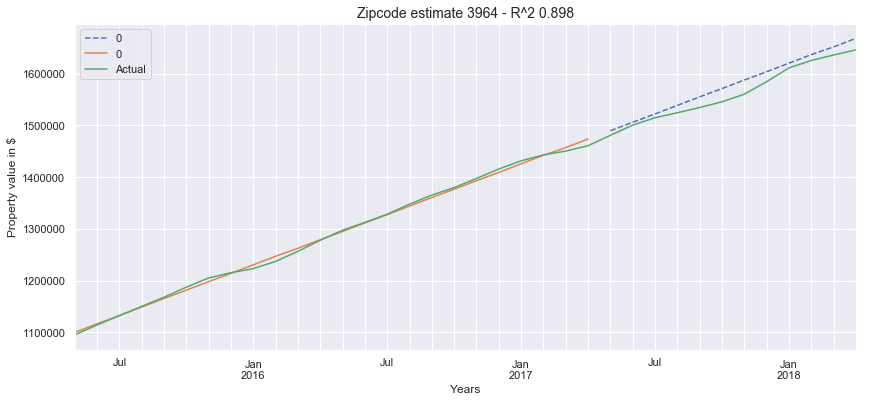

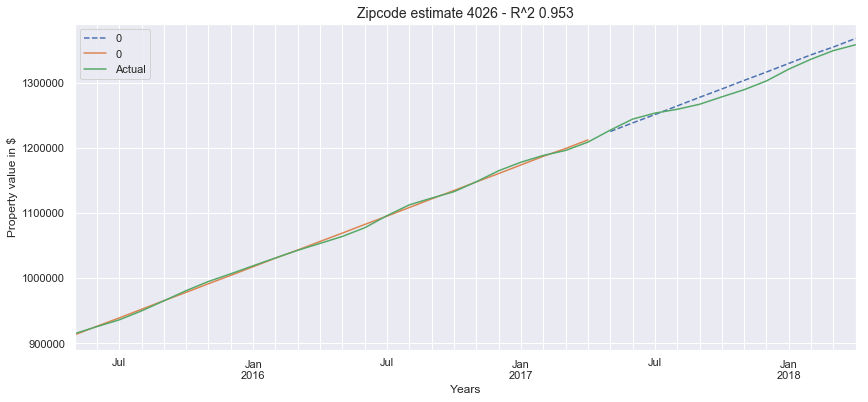

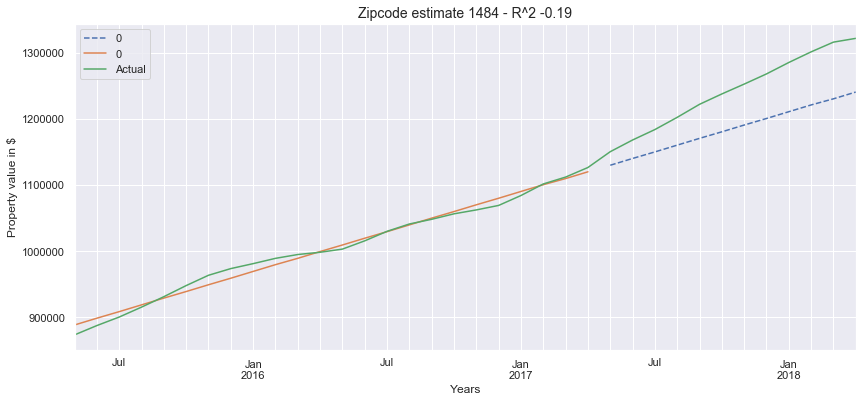

In [402]:
import datetime as dt

def transform_to_ts(df):
    ts = df.T
    ts.index = pd.to_datetime(ts.index, format='%Y-%m')
    ts.index.freq = 'MS'
    return ts

def get_ordinal_dates(dates):
    ordinal_dates = np.array(dates.map(dt.datetime.toordinal)).reshape(-1,1)
    return ordinal_dates
    
def lin_reg_score_ts(ts):
    dates = ts.index
    dates = np.array(dates.map(dt.datetime.toordinal)).reshape(-1,1)
    linreg = LinReg().fit(dates, ts)
    return linreg


train_ts = transform_to_ts(train)
test_ts = transform_to_ts(test)


# Loop through best 5
for zipcode in train_ts.columns:
    # Build model
    linreg_model = lin_reg_score_ts(train_ts[zipcode])

    X_test = test_ts[zipcode].index
    X_train = train_ts[zipcode].index

    y_hat_train = linreg_model.predict(get_ordinal_dates(X_train))
    y_hat_test = linreg_model.predict(get_ordinal_dates(X_test))
    
    prediction_score = linreg_model.score(get_ordinal_dates(X_test), test_ts[zipcode])
#     prediction_score = '120%'

    fig, ax = plt.subplots(figsize=(14,6))
    pd.DataFrame(y_hat_test, index=X_test).plot(label='Predicted', style='--', ax=ax)
    pd.DataFrame(y_hat_train, index=X_train).plot(label='Predicted', ax=ax)
    pd.concat([train_ts[zipcode], test_ts[zipcode]]).plot(label='Actual', ax=ax)
    plt.legend()
    plt.ylabel('Property value in $')
    plt.xlabel('Years')
    plt.title('Zipcode estimate {} - R^2 {}'.format(zipcode, round(prediction_score, 3)), fontsize=14)
    plt.grid(True, which='minor')
    plt.show();

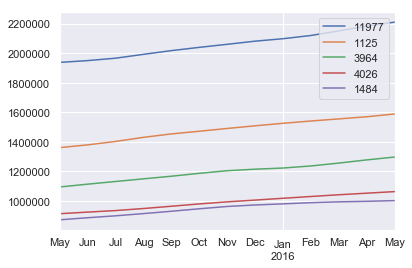

In [330]:
train_ts['2015-05':'2016-05'].plot()

In [ ]:
train_ts.

In [316]:
import datetime as dt



for ind, data in train.iterrows():
#     print((ind, data))
#     dates = np.array(pd.to_datetime(data.index, format='%Y-%m').T).reshape(1,23)
    dates = pd.to_datetime(data.index, format='%Y-%m')
    dates = dates.map(dt.datetime.toordinal)
    dates = np.array(dates.T).reshape(1,23)
#     print(dates)
    values = data.values.reshape(1,23)
#     print(values)
    LR = LinReg().fit(dates, values)
    predictions = LR.predict(dates)
#     print(predictions)
    values_df = pd.concat([pd.Series(dates),pd.Series(predictions)])
    print(values_df.head(12))
#     print()
#     LR.predict(train_x)

Exception: Data must be 1-dimensional

In [18]:
data1.index = pd.to_datetime(data1.index)
data1.head()


,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,...,84781,12429,97028,12720,1338,3293,40404,81225,89155,National Average
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,...,135900.0,78300.0,136200.0,62500.0,94600.0,92700.0,57100.0,191100.0,176400.0,118279.096623
1996-05-01,335400.0,236900.0,212200.0,500900.0,77300.0,95200.0,152700.0,216700.0,95600.0,771100.0,...,136300.0,78300.0,136600.0,62600.0,94300.0,92500.0,57300.0,192400.0,176300.0,118398.954831
1996-06-01,336500.0,236700.0,212200.0,503100.0,77300.0,95400.0,152600.0,216900.0,95800.0,776500.0,...,136600.0,78200.0,136800.0,62700.0,94000.0,92400.0,57500.0,193700.0,176100.0,118517.285485
1996-07-01,337600.0,235400.0,210700.0,504600.0,77300.0,95700.0,152400.0,217000.0,96100.0,781900.0,...,136900.0,78200.0,136800.0,62700.0,93700.0,92200.0,57700.0,195000.0,176000.0,118632.875311
1996-08-01,338500.0,233300.0,208300.0,505500.0,77400.0,95900.0,152300.0,217100.0,96400.0,787300.0,...,137100.0,78100.0,136700.0,62700.0,93400.0,92100.0,58000.0,196300.0,175900.0,118760.020465


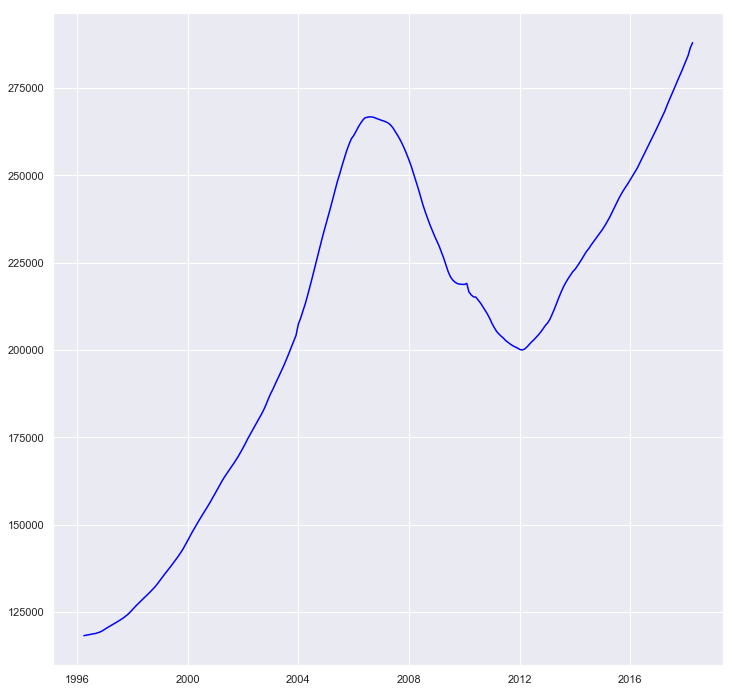

In [21]:
plt.figure(figsize=(12,12))
plt.plot(data1['National Average'], color='blue', label='Original')

In [87]:
test = data1.loc['2016-05':'2018-04'].iloc[:,-1:].reset_index()
train = data1.loc['2012-01':'2016-04'].iloc[:,-1:].reset_index()
train.columns

Index(['index', 'National Average'], dtype='object')

In [117]:
list((str(i).split("-")[:2] for i in train["index"]))

[['2012', '01'],
 ['2012', '02'],
 ['2012', '03'],
 ['2012', '04'],
 ['2012', '05'],
 ['2012', '06'],
 ['2012', '07'],
 ['2012', '08'],
 ['2012', '09'],
 ['2012', '10'],
 ['2012', '11'],
 ['2012', '12'],
 ['2013', '01'],
 ['2013', '02'],
 ['2013', '03'],
 ['2013', '04'],
 ['2013', '05'],
 ['2013', '06'],
 ['2013', '07'],
 ['2013', '08'],
 ['2013', '09'],
 ['2013', '10'],
 ['2013', '11'],
 ['2013', '12'],
 ['2014', '01'],
 ['2014', '02'],
 ['2014', '03'],
 ['2014', '04'],
 ['2014', '05'],
 ['2014', '06'],
 ['2014', '07'],
 ['2014', '08'],
 ['2014', '09'],
 ['2014', '10'],
 ['2014', '11'],
 ['2014', '12'],
 ['2015', '01'],
 ['2015', '02'],
 ['2015', '03'],
 ['2015', '04'],
 ['2015', '05'],
 ['2015', '06'],
 ['2015', '07'],
 ['2015', '08'],
 ['2015', '09'],
 ['2015', '10'],
 ['2015', '11'],
 ['2015', '12'],
 ['2016', '01'],
 ['2016', '02'],
 ['2016', '03'],
 ['2016', '04']]

In [163]:
train_x = np.array([to_posix(str(i)) for i in train["index"]]).reshape(-1, 1)
train_y = np.array(train["National Average"]).reshape(-1,1)
test_x = np.array(test["index"].apply(lambda x: np.datetime64(x))).reshape(-1, 1)
test_y= test["National Average"]

In [164]:
train_x[:5]

array([[1.3253976e+09],
       [1.3280760e+09],
       [1.3305816e+09],
       [1.3332564e+09],
       [1.3358484e+09]])

In [162]:
def to_posix(date):
    import time
    dtdt = dt.strptime(date.split(" ")[0], "%Y-%m-%d")
    posix_dt = time.mktime(dtdt.timetuple())
    return posix_dt

In [133]:
np.array(train["index"], dtype=np.datetime64).reshape(-1,1).dtype

dtype('<M8[ns]')

In [166]:
LR = LinReg().fit(train_x, train_y)
LR
LR.predict(train_x)

array([[196775.59640675],
       [197871.30433796],
       [198896.3214349 ],
       [199990.5566404 ],
       [201050.91915448],
       [202146.6270857 ],
       [203206.98959977],
       [204302.69753099],
       [205398.4054622 ],
       [206458.76797628],
       [207554.4759075 ],
       [208616.31114729],
       [209712.0190785 ],
       [210807.72700972],
       [211797.39868952],
       [212891.63389502],
       [213951.9964091 ],
       [215047.70434032],
       [216108.0668544 ],
       [217203.77478561],
       [218299.48271682],
       [219359.8452309 ],
       [220455.55316212],
       [221517.38840191],
       [222613.09633312],
       [223708.80426434],
       [224698.47594414],
       [225792.71114964],
       [226853.07366372],
       [227948.78159494],
       [229009.14410902],
       [230104.85204023],
       [231200.55997144],
       [232260.92248552],
       [233356.63041674],
       [234418.46565653],
       [235514.17358774],
       [236609.88151896],
       [2375

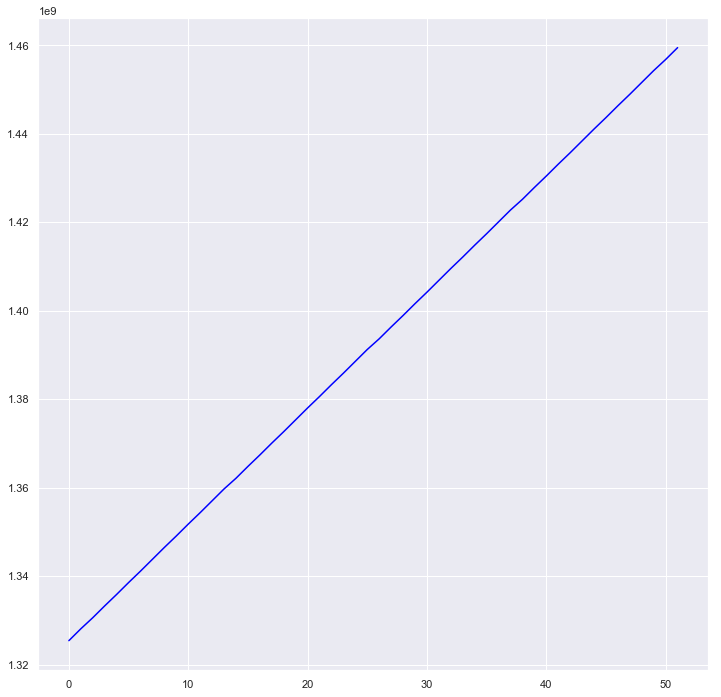

In [168]:
plt.figure(figsize=(12,12))
plt.plot(train_x, color='blue', label='Original')

In [ ]:
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

In [ ]:
import seaborn as sns
sns.set()
season = df
season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()